# Taller 1 Geometria Computacional y Diferencial

## Daniel Leyva Castro

In [25]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

### Punto 1

El siguiente codigo implementa las siguientes funciones:
- `crossProduct`: Calcula el producto cruz entre dos vectores.
- `cross`: Calcula si dos segmentos se cruzan y en caso de que se crucen, calcula el punto de interseccion o el intervalo de interseccion.

Adicionalmente se implemento la funcion `plotter` para graficar los segmentos y el punto de interseccion o el intervalo de interseccion.

In [26]:
def crossProduct(p0, p1, p2):
    # p0, p1, p2 Points on the plane
    # return the cross product of the vectors p0p1 and p0p2
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    return (x1-x0)*(y2-y0) - (x2-x0)*(y1-y0)

def cross(p0,p1,p2,p3):
    # Function that checks if two segments cross each other
    # p0, p1, p2, p3 are the points of the segments
    # p0 and p1 are the points of the first segment
    # p2 and p3 are the points of the second segment
    # return: (True, intersection point) if the segments cross each other in a single point
    # return: (True, interval) if the segments cross each other in an interval
    # return: (False, ()) if the segments do not cross each other

    if p0 > p3:
        p0, p2 = p2, p0
        p1, p3 = p3, p1

    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    cp1 = crossProduct(p2,p3,p0)
    cp2 = crossProduct(p2,p3,p1)
    cp3 = crossProduct(p0,p1,p2)
    cp4 = crossProduct(p0,p1,p3)
    crossed = False

    # Conditions to check if the segments cross each other
    conditions = [
        cp1*cp2 < 0 and cp3*cp4 <0,
        cp1 == 0 and min(x2,x3) <= x0 <= max(x2,x3) and min(y2,y3) <= y0 <= max(y2,y3),
        cp2 == 0 and min(x2,x3) <= x1 <= max(x2,x3) and min(y2,y3) <= y1 <= max(y2,y3),
        cp3 == 0 and min(x0,x1) <= x2 <= max(x0,x1) and min(y0,y1) <= y2 <= max(y0,y1),
        cp4 == 0 and min(x0,x1) <= x3 <= max(x0,x1) and min(y0,y1) <= y3 <= max(y0,y1)
    ]

    # Conditions to check if the segments cross each other in an interval
    cossedInterval = [
        cp1 * cp2 == 0, cp3 * cp4 == 0,
        min(x0, x1) <= max(x2, x3),
        min(x2, x3) <= max(x0, x1),
        min(y0, y1) <= max(y2, y3),
        min(y2, y3) <= max(y0, y1)
    ]

    if any(conditions):
        crossed = True
        if all(cossedInterval):
            if (max(x2, x3) <= max(x0, x1) or (max(y2, y3) <= max(y0, y1))) and all([cp1 * cp2 == 0, cp3 * cp4 == 0]):
                return crossed, (p2,p3)
            if min(p1,p2) == max(p1,p2):
                return crossed, p1

            return crossed, (min(p1,p2), max(p1,p2))

        # get the intersection point using matrix
        A = np.matrix([
            [x2-x3, x1-x0],
            [y2-y3, y1-y0]
        ])


        # get the inverse of the matrix
        Ainv = np.linalg.inv(A)

        r = Ainv*np.matrix([[x1-x3],[y1-y3]])

        pcx = r[1][0] * p0[0] + (1 - r[1][0]) * p1[0]
        pcy = r[1][0] * p0[1] + (1 - r[1][0]) * p1[1]

        return crossed, (float(pcx), float(pcy))
    else:
        return crossed, ()

def plotter(cross, s1, s2):
    # Plotting the segments
    plt.plot([s1[0][0], s1[1][0]], [s1[0][1], s1[1][1]], 'o-')
    plt.plot([s2[0][0], s2[1][0]], [s2[0][1], s2[1][1]], 'o-')

    if not cross[0]:
        plt.title('Points do not cross each other')
    else:
        if type(cross[1][0]) == tuple:
            plt.title('Points cross each other in an interval')
            plt.plot([cross[1][0][0], cross[1][1][0]], [cross[1][0][1], cross[1][1][1]], 'o-')

        else:
            plt.title('Points cross each other in a single point')
            plt.plot(cross[1][0], cross[1][1], 'ro')


    # legends
    plt.legend(['Segment 1', 'Segment 2', f'Intersection:\n {cross[1]}'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

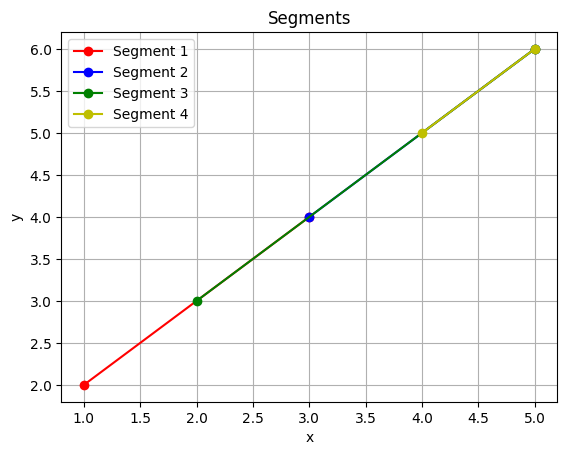

In [27]:
# Defining segments given
s1 = [(1,2),(3,4)]
s2 = [(3,4),(5,6)]
s3 = [(2,3),(5,6)]
s4 = [(4,5),(5,6)]

# Plotting the segments
plt.plot([s1[0][0], s1[1][0]], [s1[0][1], s1[1][1]], 'ro-', label='Segment 1')
plt.plot([s2[0][0], s2[1][0]], [s2[0][1], s2[1][1]], 'bo-', label='Segment 2')
plt.plot([s3[0][0], s3[1][0]], [s3[0][1], s3[1][1]], 'go-', label='Segment 3')
plt.plot([s4[0][0], s4[1][0]], [s4[0][1], s4[1][1]], 'yo-', label='Segment 4')
plt.title('Segments')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Ahora se comprobaran las intesecciones:
- Segmento 1 con segmento 2
- Segmento 1 con segmento 3
- Segmento 1 con segmento 4

## Segmento 1 con segmento 2: Interseccion en un punto.

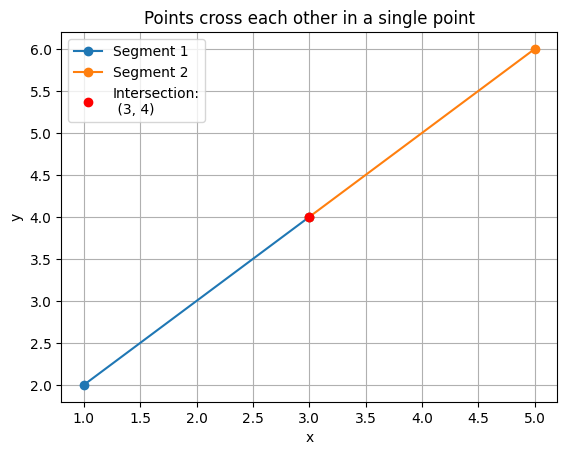

In [56]:
# Case 1: S1 - S2
plotter(cross(s1[0],s1[1],s2[0],s2[1]), s1, s2)

## Segmento 1 con segmento 3: Interseccion en un intervalo.

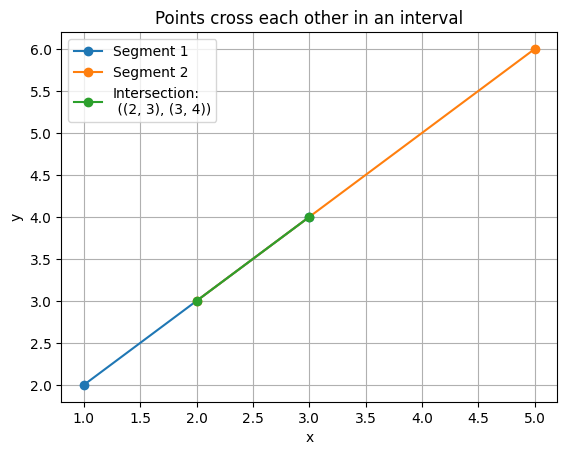

In [29]:
# Case 2: S1 - S3
plotter(cross(s1[0],s1[1],s3[0],s3[1]), s1, s3)

## Segmento 1 con segmento 4: Interseccion en un punto.

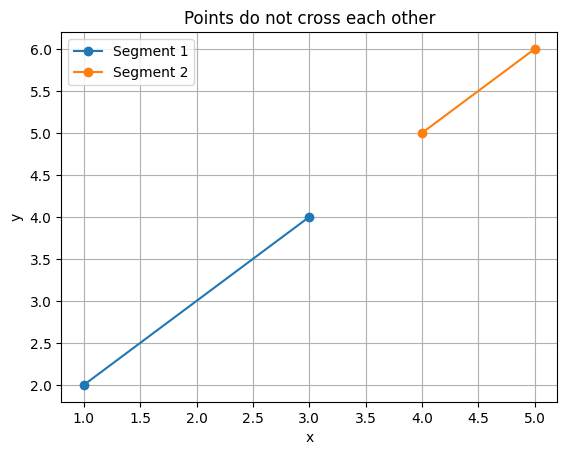

In [30]:
# Case 3: S1 - S4
plotter(cross(s1[0],s1[1],s4[0],s4[1]), s1, s4)

### Punto 2

#### a) Algoritmo "Divide and Conquer" para encontral la envolvente convexa de un conjunto de puntos.

Inicialmente se implementa el algoritmo de Graham para calcular la envolvente convexa. Esto se utiliza para los sub casos de el algoritmo "Divide and Conquer".

In [52]:
def direction(p0, p1, p2):
    # p0, p1, p2 are points
    # return: -1 if counter-clockwise, 1 if clockwise, 0 if colinear
    cp = crossProduct(p0=p0, p1=p1, p2=p2)
    if cp > 0:
        return -1  # Left
    elif cp < 0:
        return 1  # Right
    elif cp == 0:
        return 0  # Colinear


def slope(p0,p1):
    x0, y0 = p0
    x1, y1 = p1
    try:
        return (y1-y0)/(x1-x0)
    except:
        return float("inf")

def distance(p0, p1):
    x0, y0 = p0
    x1, y1 = p1
    return math.sqrt((x1-x0)**2 + (y1-y0)**2)

def getMin(points : list) -> tuple:
    xs = [i[0] for i in points]
    ys = [i[1] for i in points]

    temp = min(xs)
    xminindex = [i for i, j in enumerate(xs) if j == temp]

    if len(xminindex) != 1:
        ymin = min([ys[i] for i in xminindex])
        tmin = points[ys.index(ymin)]
    else:
        tmin = points[xminindex[0]]
    return tmin

def clearPoints(points: list, p0):
    # create a list of the points without p0 sorted by slope
    points.remove(p0)
    # get the poins with the same slopes
    a = {}
    for i in points:

        if slope(p0, i) not in a.keys():
            a[slope(p0, i)] = [i]
        else:
            a[slope(p0, i)].append(i)

    for i in a:
        a[i].sort(key=lambda x: distance(p0, x))

    final = [a[i][-1] for i in a]
    final.sort(key = lambda x : slope(p0, x))
    return final

def graham(points):
    S = []
    p0 = getMin(points)
    S.append(p0)
    heap = clearPoints(points, p0)
    S.append(heap[0])
    heap.pop(0)
    S.append(heap[0])
    heap.pop(0)
    # print(S)
    for i in heap:
        S.append(i)
        while direction(S[-3], S[-2], S[-1]) != -1:
            S.pop(-2)
    S.append(p0)
    return S

Ahora se implementa el algoritmo "Divide and Conquer" para encontrar la envolvente convexa de un conjunto de puntos.

In [53]:
def findTangent(hull1, hull2, h1r, h2l, tail):
    h1r = hull1.index(h1r)
    h2l = hull2.index(h2l)
    if tail == 0:
        while 1:
            while direction(hull1[h1r], hull2[h2l], hull2[(h2l + 1) % len(hull2)]) >= 0:
                h2l = (h2l + 1) % len(hull2)
            if direction(hull2[h2l], hull1[h1r], hull1[(len(hull1) + h1r - 1) % len(hull1)]) <= 0:
                while direction(hull2[h2l], hull1[h1r], hull1[(len(hull1) + h1r - 1) % len(hull1)]) <= 0:
                    h1r = (len(hull1) + h1r - 1) % len(hull1)
            else:
                break

        return h1r, h2l

    elif tail == 1:
        while 1:
            while direction(hull2[h2l], hull1[h1r], hull1[(h1r + 1) % len(hull1)]) >= 0:
                h1r = (h1r + 1) % len(hull1)
            if direction(hull1[h1r], hull2[h2l], hull2[(len(hull2) + h2l - 1) % len(hull2)]) <= 0:
                while direction(hull1[h1r], hull2[h2l], hull2[(len(hull2) + h2l - 1) % len(hull2)]) <= 0:
                    h2l = (len(hull2) + h2l - 1) % len(hull2)
            else:
                break

        return h1r, h2l

def merger(hull1, hull2):
    # hull1 and hull2 are the convex hulls of two sets of points
    # return: the convex hull of the union of the two sets of points
    if hull1[-1] == hull1[0]:
        hull1.pop()

    if hull2[-1] == hull2[0]:
        hull2.pop()

    h1r = max(hull1, key=lambda x: x[0])  # Rightmost point of hull1
    h2l = min(hull2, key=lambda x: x[0])  # Leftmost point of hull2

    # tans
    # utia, utib = findUpperTangent(hull1, hull2, h1r, h2l)
    # ltia, ltib = findLowerTangent(hull1, hull2, h1r, h2l)

    utia, utib = findTangent(hull1, hull2, h1r, h2l, 1)
    ltia, ltib = findTangent(hull1, hull2, h1r, h2l, 0)

    hull = []

    # Append points from upper tangent point on set 1 to lower tangent point on set 1
    start = utia
    while 1:
        hull.append(hull1[start])
        if start == ltia:
            break

        start = (start + 1) % len(hull1)

    # Append points from lower tangent point on set 2 to upper tangent point on set 2
    start = ltib
    while 1:
        hull.append(hull2[start])
        if start == utib:
            break

        start = (start + 1) % len(hull2)

    return hull

def divideAndConquer(points):
    # points is a list of points
    # return: the convex hull of the set of points
    points.sort(key=lambda x: x[0])
    points1 = points[:len(points) // 2]
    points2 = points[len(points) // 2:]

    hull1 = graham(points1)
    hull2 = graham(points2)

    hull = merger(copy.deepcopy(hull1), copy.deepcopy(hull2))
    hull.append(hull[0])

    fig = plt.figure(figsize=(10, 5))
    fig.suptitle('Divide and Conquer')
    subfigs = fig.subplots(1, 2)
    subfigs[0].plot([i[0] for i in points1], [i[1] for i in points1], 'ro')
    subfigs[0].plot([i[0] for i in points2], [i[1] for i in points2], 'ro')
    subfigs[0].plot([i[0] for i in hull1], [i[1] for i in hull1], 'b-')
    subfigs[0].plot([i[0] for i in hull2], [i[1] for i in hull2], 'b-')
    subfigs[0].title.set_text('Splited Convex Hulls')

    subfigs[1].plot([i[0] for i in points], [i[1] for i in points], 'ro')
    subfigs[1].plot([i[0] for i in hull], [i[1] for i in hull], 'b-')
    subfigs[1].title.set_text('Merged Convex Hull')

    plt.show()
    return hull


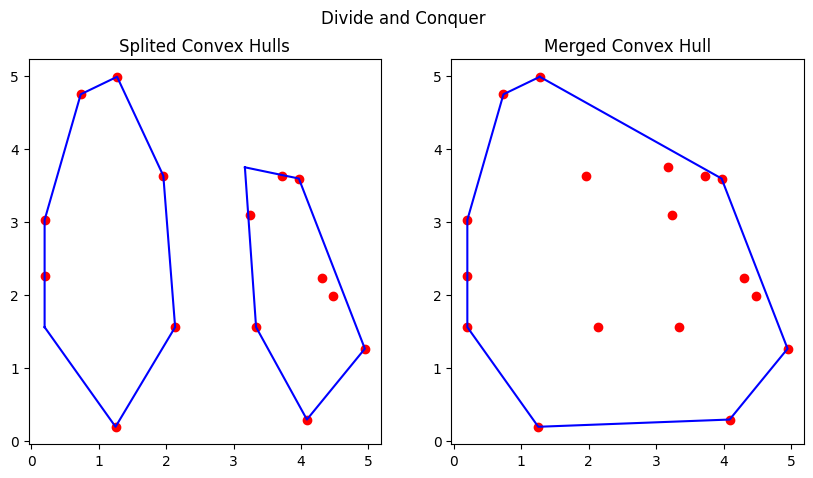

In [57]:
points = [(4.4761, 1.994), (4.9466, 1.2667), (0.1991, 3.0293), (1.2734, 4.9885), (1.9589, 3.6342), (3.7172, 3.6357),
              (4.0876, 0.2972), (4.304, 2.2281), (3.2383, 3.0908), (3.1682, 3.7495), (0.7345, 4.7487), (3.968, 3.5959),
              (1.2508, 0.1982), (0.1991, 2.256), (0.1991, 1.562), (2.134, 1.562), (3.334, 1.562)]

hull = divideAndConquer(points)